In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

dirs = ["Linux", "ukl-process", "ukl-ks", "ukl-us", "ukl-ks-bp", "ukl-us-bp"]
sizes = np.arange(256, 20490, 256)
xtix = np.arange(0, 20490, 4096)
sizes = np.insert(sizes, 0 ,1)
colors = ['blue', 'orange', 'green', 'purple', 'teal', 'red']
markers = ["+", "x", "1", "2", "3", "4"]

def size_function(testname):
    plt.figure("main", figsize=(5,4), dpi= 100, facecolor='w', edgecolor='k')
    ax = plt.gca()
    ax1 = ax.inset_axes([0.5, 0.05, 0.45, 0.37])
    for d in dirs:
        normalArr = np.empty((0,5), float)
        filename = d + "/mybench_small_" + testname + ".csv"
        print(filename)
        tmp = pd.read_csv(filename)
        for i in np.nditer(sizes):
            col = tmp.loc[tmp["Size"] == i, "Latency"]
            col = col.mul(1000000)
            newArr = np.array([[np.mean(col), np.std(col), np.percentile(col, 90), np.percentile(col, 99), \
                                np.amin(col)]])
            normalArr = np.append(normalArr, newArr, axis=0)
        ax.plot(sizes, normalArr[:,0], label=d, linewidth=1.5, \
                     color=colors[dirs.index(d)])#, marker=markers[dirs.index(d)])
        if d == "Linux" or d == "ukl-us-bp":
            ax1.fill_between(sizes, normalArr[:,4], normalArr[:,3], \
                             facecolor=colors[dirs.index(d)], \
                             alpha=0.5)
            ax1.plot(sizes, normalArr[:,0], label=d, linewidth=1, \
                 color=colors[dirs.index(d)])
    ax1.grid()
    ax1.set_xlim(0,20480)
    ax1.set_ylim(0)
    plt.xlim(xmin=0)
    plt.xlabel("Bytes")
    plt.ylabel("Time (us)")
    plt.ylim(ymin=0)
    plt.xlim(xmax=20480)
    ax.set_xticks(xtix)
    ax1.set_xticks(xtix)
    ax1.set_xticklabels([])
    plt.legend(bbox_to_anchor=(0,1.02,1,0.2),loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)
    plt.grid()
    plt.title(testname.capitalize()+" latency as a function of buffer size", pad=40)
    plt.tight_layout()
    plt.savefig(testname+'.pdf')
    plt.show()
    

Linux/mybench_small_read.csv
ukl-process/mybench_small_read.csv
ukl-ks/mybench_small_read.csv
ukl-us/mybench_small_read.csv
ukl-ks-bp/mybench_small_read.csv
ukl-us-bp/mybench_small_read.csv


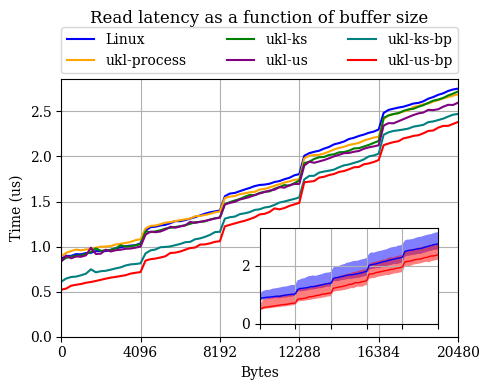

In [2]:
size_function("read")

Linux/mybench_small_write.csv
ukl-process/mybench_small_write.csv
ukl-ks/mybench_small_write.csv
ukl-us/mybench_small_write.csv
ukl-ks-bp/mybench_small_write.csv
ukl-us-bp/mybench_small_write.csv


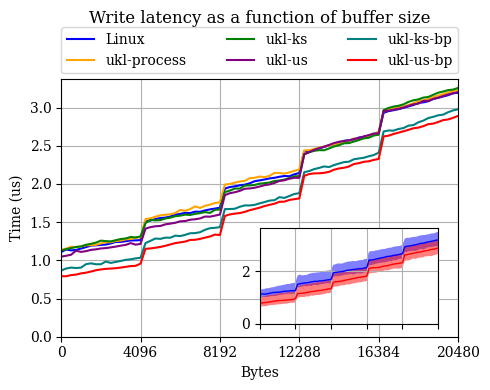

In [3]:
size_function("write")

Linux/mybench_small_mmap.csv
ukl-process/mybench_small_mmap.csv
ukl-ks/mybench_small_mmap.csv
ukl-us/mybench_small_mmap.csv
ukl-ks-bp/mybench_small_mmap.csv
ukl-us-bp/mybench_small_mmap.csv


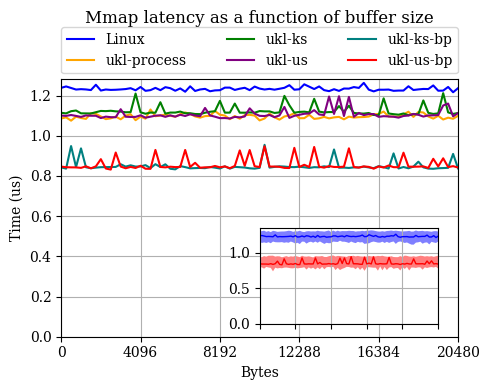

In [4]:
size_function("mmap")

Linux/mybench_small_munmap.csv
ukl-process/mybench_small_munmap.csv
ukl-ks/mybench_small_munmap.csv
ukl-us/mybench_small_munmap.csv
ukl-ks-bp/mybench_small_munmap.csv
ukl-us-bp/mybench_small_munmap.csv


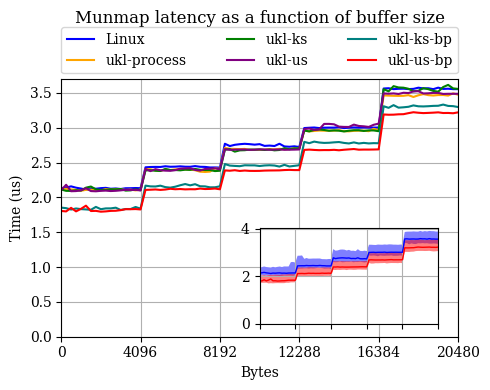

In [5]:
size_function("munmap")

Linux/mybench_small_pagefault.csv
ukl-process/mybench_small_pagefault.csv
ukl-ks/mybench_small_pagefault.csv
ukl-us/mybench_small_pagefault.csv
ukl-ks-bp/mybench_small_pagefault.csv
ukl-us-bp/mybench_small_pagefault.csv


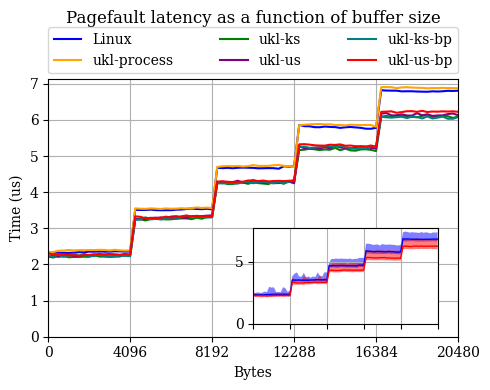

In [6]:
size_function("pagefault")

In [7]:
counts = np.arange(50, 1000, 50)
counts = np.insert(counts, 0 ,1)
def count_function(testname):
    plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
    for d in dirs:
        normalArr = np.empty((0,3), float)
        filename = d + "/mybench_small_" + testname + ".csv"
        print(filename)
        tmp = pd.read_csv(filename)
        for i in np.nditer(counts):
            col = tmp.loc[tmp["Count"] == i, "Latency"]
            stats = col.describe()
            newArr = np.array([[stats["mean"], stats["std"], \
                                   col.quantile(0.99)]])
            normalArr = np.append(normalArr, newArr, axis=0)
        #print(normalArr)
        #plt.errorbar(sizes, normalArr[:,0], yerr=normalArr[:,1], label=d)
        plt.scatter(counts, normalArr[:,0], label=d, linewidth=10)
    plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.legend()
    plt.grid()
    plt.show()
    plt.savefig('line_plot.pdf')


In [8]:
#count_function("epoll")

In [9]:
barsizes = np.arange(200, 4500, 400)
print(barsizes)
barlabels = ["0.1","1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
def size_bar_errors(testname):
    plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
    for d in dirs:
        normalArr = np.empty((0,3), float)
        filename = d + "/mybench_small_" + testname + ".csv"
        print(filename)
        tmp = pd.read_csv(filename)
        col = tmp.loc[tmp["Size"] == 1, "Latency"]
        stats = col.describe()
        #print(stats)
        newArr = np.array([[stats["mean"], stats["std"], \
                                col.quantile(0.99)]])
        normalArr = np.append(normalArr, newArr, axis=0)
        for i in range(3840, 40960, 4096):
            col = tmp.loc[tmp["Size"] == i, "Latency"]
            stats = col.describe()
            #print(stats)
            newArr = np.array([[stats["mean"], stats["std"], \
                                   col.quantile(0.90)]])
            normalArr = np.append(normalArr, newArr, axis=0)
        #plt.bar(barsizes+dirs.index(d)*60-110, normalArr[:,2], yerr=normalArr[:,2], label=d, width=60)
        plt.bar(barsizes+dirs.index(d)*50-100, normalArr[:,2], label=d, width=60)
    plt.xlim(xmin=0)
    plt.ylim(ymin=0)
    plt.xticks(ticks=barsizes, labels=barlabels)
    plt.legend()
    #plt.figure(figsize=(3, 3))
    plt.show()

[ 200  600 1000 1400 1800 2200 2600 3000 3400 3800 4200]


In [10]:
#size_bar_errors("read")

In [11]:
#size_bar_errors("write")

In [12]:
#size_bar_errors("mmap")

In [13]:
#size_bar_errors("munmap")

In [14]:
#size_bar_errors("pagefault")